In [1]:
import matplotlib.pyplot as plt

figsize = (3.5, 3)

In [2]:
from pcpptc import PolygonInstance
from shapely.geometry import Polygon, Point


area = Polygon(
    shell=[
        Point(5.0, 5.0),
        Point(4.0, 12.0),
        Point(0.0, 9.0),
        Point(0.0, 13.0),
        Point(3.0, 15.0),
        Point(10.0, 15.0),
        Point(15.0, 14.0),
        Point(17.0, 6.0),
        Point(11.0, 6.5),
        Point(11.0, 10.0),
        Point(10.0, 12.0),
        Point(9.0, 12.0),
        Point(10.0, 10.0),
        Point(10.0, 4.0),
    ][::-1]
)
area = Polygon(
    shell=[
        Point(9.0, 18.0),
        Point(1.0, 16.0),
        Point(0.0, 9.0),
        Point(4.0, 8.0),
        Point(4.0, 13.0),
        Point(8.0, 12.0),
        Point(5.0, 7.0),
        Point(5.0, 2.0),
        Point(12.0, 1.0),
        Point(14.0, 6.0),
        Point(12.0, 10.0),
        Point(13.0, 12.0),
        Point(19.0, 11.0),
        Point(21.0, 14.0),
        Point(18.0, 17.0),
    ],
)
# holes=[[(13.0, 16.0), (11.0, 13.0), (10.0, 14.0)]])
valuable_areas = [
    [
        Polygon(
            shell=[Point(0.0, 14.0), Point(0.0, 8.0), Point(4.0, 8.0), Point(4.0, 13.0)]
        ),
        130.0,
    ],
    [
        Polygon(
            shell=[
                Point(6.0, 3.0),
                Point(14.0, 2.0),
                Point(15.0, 10.0),
                Point(6.0, 6.0),
            ]
        ),
        130.0,
    ],
    [
        Polygon(
            shell=[
                Point(15.0, 11.0),
                Point(21.0, 10.0),
                Point(22.0, 16.0),
                Point(14.0, 16.0),
            ]
        ),
        130.0,
    ],
]
for i, (poly, val) in enumerate(valuable_areas):
    poly = poly.intersection(area)
    valuable_areas[i][0] = poly


# valuable_area = Polygon(shell=[Point(0.0, 0.0), Point(0.0, 15.0), Point(2.0, 17.0), Point(3.0, 10.0), Point(16.0, 8.0), Point(16.0, 0.0)])

# valuable_areas = list(area.intersection(valuable_area))
# assert len(valuable_areas)==2

# valuable_areas = [(valuable_areas[0], 130.0),
#                 (valuable_areas[1], 130.0),
#                (valuable_areas[2], 130.0)]
pi = PolygonInstance(
    feasible_area=area.buffer(-0.5),
    tool_radius=0.5,
    original_area=area,
    valuable_areas=valuable_areas,
    turn_cost=25.0,
    distance_cost=10.0,
)

<Figure size 432x288 with 0 Axes>

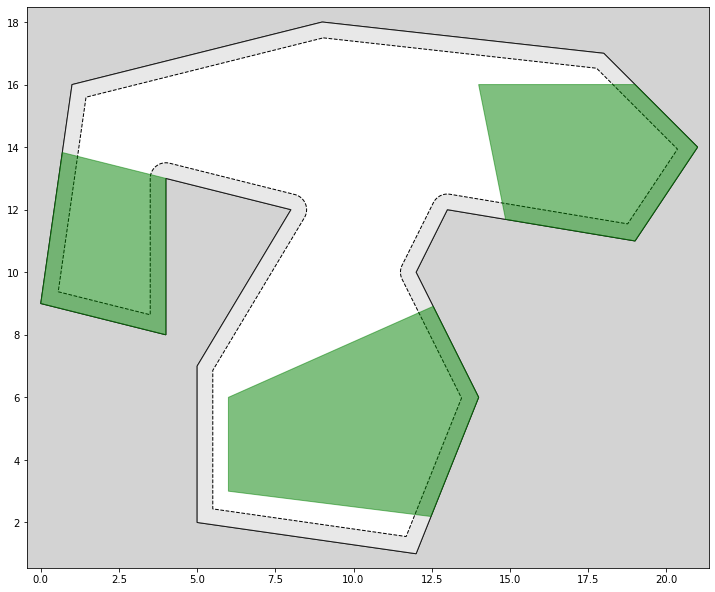

In [3]:
from pcpptc.plot import setup_plot, plot_polygon_instance

ax = setup_plot()
plot_polygon_instance(ax, pi, plot_valuable_areas=True)
plt.show()

In [4]:
from pcpptc.instance_converter.dmsh import DmshGrid

gi = DmshGrid(full_coverage=False, point_based=False, buffer=0.1)(pi)

Numerical problems for Voronoi-cell of PointVertex[139682256640336]@(6.529363554382531, 16.815413865073204). Using workaround.
Numerical problems for Voronoi-cell of PointVertex[139682256641744]@(7.794039457356742, 17.13158284081676). Using workaround.
Numerical problems for Voronoi-cell of PointVertex[139682256638160]@(2.8034921395355576, 15.883946011361463). Using workaround.
Numerical problems for Voronoi-cell of PointVertex[139682256640080]@(4.125163769867481, 16.214363918944443). Using workaround.
Numerical problems for Voronoi-cell of PointVertex[139682256640208]@(5.328648068078851, 16.515234993497288). Using workaround.


<Figure size 432x288 with 0 Axes>

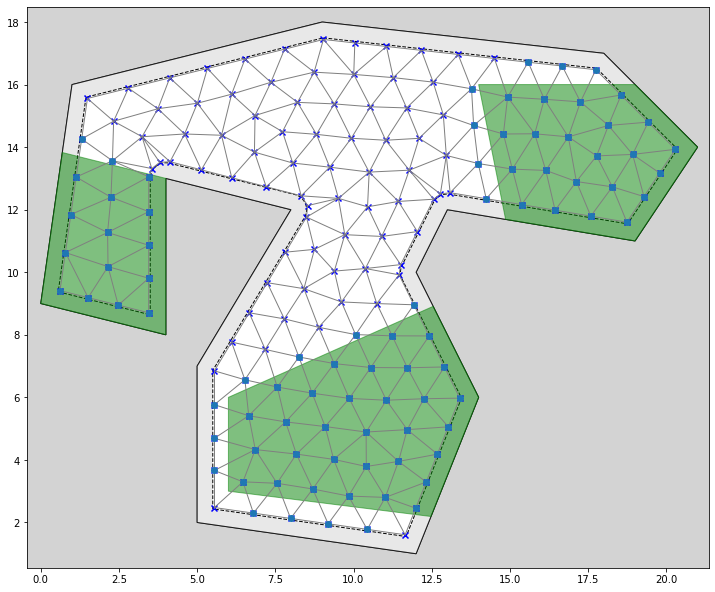

In [5]:
from pcpptc.plot.intermediate import plot_graph

ax = setup_plot()
plot_polygon_instance(ax, pi, plot_valuable_areas=True)
plot_graph(ax, gi.graph)

valuable_points = [
    v for v in gi.graph.nodes if gi.coverage_necessities[v].penalty_vector
]
plt.scatter([v.x for v in valuable_points], [v.y for v in valuable_points], zorder=3)

Cycle Cover: Computing fractional solution...
Academic license - for non-commercial use only - expires 2021-09-25
Using license file /home/ANONYMOUS_USER/gurobi.lic
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 502 rows, 2726 columns and 5919 nonzeros
Model fingerprint: 0x28a60b7f
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [2e-02, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 0 rows and 60 columns
Presolve time: 0.01s
Presolved: 502 rows, 2666 columns, 5859 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   8.700000e+01   0.000000e+00      0s
     414    2.0167270e+03   0.000000e+00   0.000000e+00      0s

Solved in 414 iterations and 0.02 seconds
Optimal objective  2.016727012e+03
Cycle Cover: Creating matching problem...
Cycle Cover: Solving matc

<Figure size 432x288 with 0 Axes>

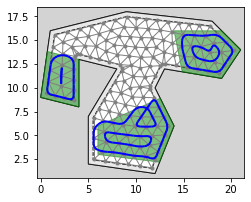

In [6]:
from pcpptc.plot import plot_solution
from pcpptc.grid_solver.cycle_cover.solver import CycleCoverSolver

cc = CycleCoverSolver(k=3, r=2)(gi)
ax = setup_plot(figsize=figsize)
plot_polygon_instance(ax, pi, plot_valuable_areas=True)
plot_graph(ax, gi.graph, marker=".", vertex_color="grey", edge_color="grey")
for tour in cc:
    plot_solution(ax, tour.waypoints(), color="blue", w=2)
plt.tight_layout()
plt.savefig("09_cycles.pdf")
plt.show()

Connecting 6 cycles
Trying to connect greedily
6 cycles remaining
Computing PCST
Connecting PCST via DFS


<Figure size 432x288 with 0 Axes>

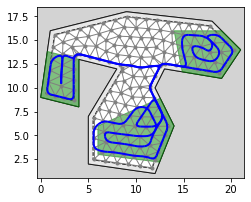

In [7]:
from pcpptc.grid_solver.cycle_connecting import connect_cycles_via_pcst

tour = connect_cycles_via_pcst(gi, cc)

ax = setup_plot(figsize=figsize)
plot_polygon_instance(ax, pi, plot_valuable_areas=True)
plot_graph(ax, gi.graph, marker=".", vertex_color="grey", edge_color="grey")
plot_solution(ax, tour.waypoints(), color="blue", w=2)
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

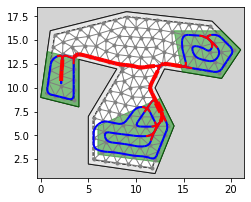

In [8]:
from pcpptc.plot.intermediate import plot_fractional_solution
from pcpptc.grid_solver.grid_solution import FractionalSolution

frac_sol = tour.to_fractional_solution()
redundant_frac_sol = FractionalSolution()
for v in frac_sol.vertices():
    if sum(frac_sol.at_vertex(v).values()) > 1.0:
        for vp, val in frac_sol.at_vertex(v).items():
            redundant_frac_sol[vp] = val
ax = setup_plot(figsize=figsize)
plot_polygon_instance(ax, pi, plot_valuable_areas=True)
plot_graph(ax, gi.graph, marker=".", vertex_color="grey", edge_color="grey")
plot_solution(ax, tour.waypoints(), color="blue", w=2)
plot_fractional_solution(ax, redundant_frac_sol, color="red", linewidth=2, zorder=3)
plt.tight_layout()
plt.savefig("09_tour_with_redundancies.pdf")
plt.show()